<a href="https://colab.research.google.com/github/01-Projects-In-Python/Project-SPAM_HAM-Dataset-and-Energy-Consumption-Dataset/blob/main/Code-Projects-SPAM_HAM-Dataset-and-Energy-Consumption-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1: TEXT CLASSIFICATION USING LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER - SPAM/HAM Dataset

In [ ]:
# Start Here for Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [ ]:
df_spam = pd.read_csv('spamhamtrain.csv')

In [ ]:
df_spam.head()

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


__Question 1:__

Use Count vectorizer to convert the texts into numerical values. Make sure to perform EDA first to check for any issues with the data.

In [ ]:
# Performing the EDA:
df_spam.shape

(4457, 2)

In [ ]:
df_null = df_spam.isnull().sum()
print(df_null[df_null > 0])

Series([], dtype: int64)


**Intepretation: There are not missing values in the dataset, it has 1 class column 1 attribute column and 4457 rows.

In [ ]:
df_spam.describe()

,Category,Message
count,4457,4457
unique,2,4157
top,ham,"Sorry, I'll call later"
freq,3863,26


In [ ]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4457 non-null   object
 1   Message   4457 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


In [ ]:
df_spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         3863   3635                             Sorry, I'll call later   
spam         594    522  Please call our customer service representativ...   

               
         freq  
Category       
ham        26  
spam        4

** Interpretation: In this dataset, we have 3863 messages that are ham and 594 that are spam. Of this total, 3635 are unique ham SMS and 522 are unique spam SMS. The most frequent ham SMS is 'Sorry, I'll call later'.

In [ ]:
# Verifying the length of the SMS messages
df_spam['length'] = df_spam['Message'].apply(len)
df_spam.head()

,Category,Message,length
0,ham,"K I'm leaving soon, be there a little after 9",45
1,ham,No. Yes please. Been swimming?,30
2,ham,It took Mr owl 3 licks,22
3,ham,Its going good...no problem..but still need li...,102
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155


In [ ]:
df_spam['length'].describe()

count    4457.000000
mean       80.374467
std        60.329466
min         2.000000
25%        35.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

** Inrepretation: We can see that the average SMS message length is 80.37 values, the shortest is 2 and the longests has 910 values.

In [ ]:
# Now, we will create a binary column that represent ham and spam messages
df_spam['cat_num'] = df_spam['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
df = df_spam.drop('Category', axis = 1)

In [ ]:
df.head()

,Message,length,cat_num
0,"K I'm leaving soon, be there a little after 9",45,0
1,No. Yes please. Been swimming?,30,0
2,It took Mr owl 3 licks,22,0
3,Its going good...no problem..but still need li...,102,0
4,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,0


In [ ]:
df.shape

(4457, 3)

<Axes: ylabel='Frequency'>

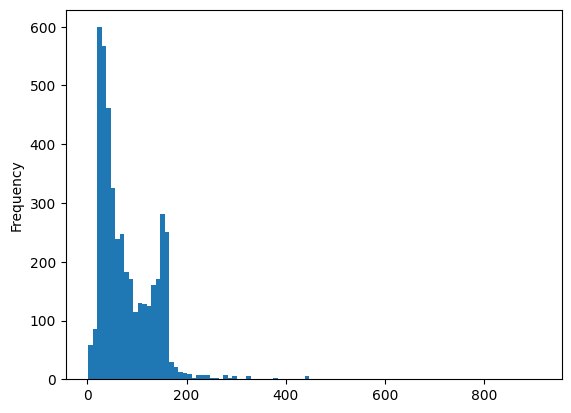

In [ ]:
# Plotting histograms to see the message length distribution:
df['length'].plot(bins=100, kind='hist')

**Interpretation: The SMS messages length of around 50 values has the highest frequency followed by messages with around 150 values. Next, we will see the distribution of the ham and spam messages:

In [ ]:
# Creating subsets to visualize the spam and ham SMS distribution
ham = df[df['cat_num']==0]
spam = df[df['cat_num']==1]

In [ ]:
ham.head()

,Message,length,cat_num
0,"K I'm leaving soon, be there a little after 9",45,0
1,No. Yes please. Been swimming?,30,0
2,It took Mr owl 3 licks,22,0
3,Its going good...no problem..but still need li...,102,0
4,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,0


In [ ]:
spam.head()

,Message,length,cat_num
8,Back 2 work 2morro half term over! Can U C me ...,159,1
17,PRIVATE! Your 2003 Account Statement for shows...,134,1
21,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,155,1
26,Guess what! Somebody you know secretly fancies...,156,1
37,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",142,1


<Axes: ylabel='Frequency'>

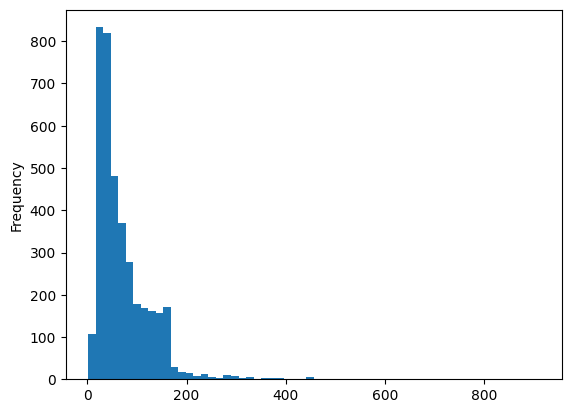

In [ ]:
ham['length'].plot(bins=60, kind='hist')

<Axes: ylabel='Frequency'>

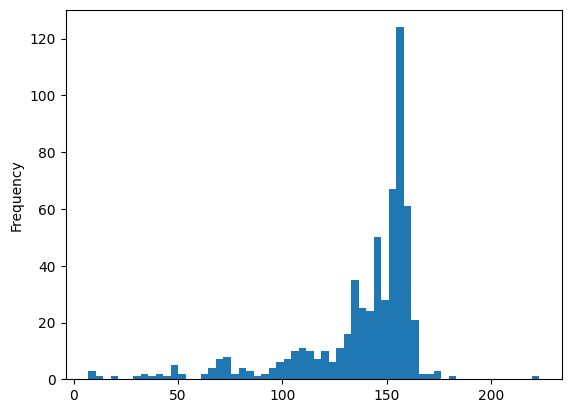

In [ ]:
spam['length'].plot(bins=60, kind='hist')

**Interpretation: We can see on these histograms the spam messages tend to be longer with more than 150 values, on the other hand, ham messages tend to be shorter with less than 100 values.

In [ ]:
#Converting the text into numerical values:
vectorizer = CountVectorizer()
df_countvectorizer = vectorizer.fit_transform(df['Message'])

In [ ]:
# Printing the unique messages values
print(vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'zouk' 'zyada' '〨ud']


In [ ]:
# Creating the array of unique values
print(df_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Verifying the shape
df_countvectorizer.shape

(4457, 7718)

**Interpretation: As we can see in the shape function, we converted the text messages to numerical and stored them in an array with dimensions of (4457, 7718)

__Question 2:__

Use Logistic Regression with L2 Regularisation (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. [5 Marks]

In [ ]:
# Splitting the dataset:
X = df_countvectorizer # Vector of observations and count of unque values
y = df['cat_num']

In [ ]:
X.shape

(4457, 7718)

In [ ]:
y.shape

(4457,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# Building the model
lg_model = LogisticRegression(penalty = 'l2', max_iter = 500)
lg_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
predictions = lg_model.predict(X_test)

In [ ]:
# Evaluationg the model performance using classification report (precision, recall, f1-score)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       767
           1       0.97      0.82      0.89       125

    accuracy                           0.97       892
   macro avg       0.97      0.91      0.94       892
weighted avg       0.97      0.97      0.97       892



In [ ]:
accuracy_score = lg_model.score(X_test, y_test)
print('Model accuracy {0}'.format(accuracy_score))

Model accuracy 0.9719730941704036


**Interpretation: In the classification report, we can see that the accuracy (precision) for the ham SMS (0) is 0.97 and the accuracy for the spam SMS is (1) which means that our model is performing pretty well and it predictions are really close to the actual values.

__Question 3__

Compare your result with Random Forest Classifier for this same dataset. (using your intelligent choice of Hyperparameters).[5 Marks]

In [ ]:
# Splitting the dataset for the RF model
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
df_rf = RandomForestClassifier(n_estimators=100) # the most used parameters are estimators and criterion
df_rf.fit(X2_train, y2_train)

RandomForestClassifier()

In [ ]:
y_pred = df_rf.predict(X2_test)

In [ ]:
# Evaluationg the model performance using classification report (precision, recall, f1-score)
print(classification_report(y2_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       767
           1       1.00      0.76      0.86       125

    accuracy                           0.97       892
   macro avg       0.98      0.88      0.92       892
weighted avg       0.97      0.97      0.96       892



In [ ]:
accuracy_rf = df_rf.score(X2_test, y2_test)
print('Model accuracy {0}'.format(accuracy_rf))

Model accuracy 0.9663677130044843


**Interpretation: In the classification report of the Random Fores model, we can see that the accuracy (precision) for the ham SMS (0) is 0.96 and the accuracy for the spam SMS is (1) is 1 which means that our model is performing good as well but the overall performance is a little bit lower than the Logistic Model.

# PROJECT 2: SGD REGRESSOR USING K-CROSS FOLD AND REGULARIZATION - Steel Industry Energy Consumption Dataset

In [ ]:
steel = pd.read_csv('Steel_industry_data.csv')

In [ ]:
steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


__Question 1__:

Perform EDA first, delete the date column and check for nulls in the data. Also check for cross correlation among attributes. If high cross-correlation present between any attributes, append the new correlated attributes to the data as a new column (such as x1*x2, where x1 and x2 are sample attributes in the dataset). Keep the cross correlation linear and exclude polynomial attributes. [4 Marks]

In [ ]:
# EDA:
steel.shape

(35040, 11)

In [ ]:
steel.isnull()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
35035,False,False,False,False,False,False,False,False,False,False,False
35036,False,False,False,False,False,False,False,False,False,False,False
35037,False,False,False,False,False,False,False,False,False,False,False
35038,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
steel_na = steel.isnull().sum()
print(steel_na[steel_na > 0])

Series([], dtype: int64)


** Interpretation: There are not missing values in the dataset

In [ ]:
# Deleting date column:
steel = steel.drop('date', axis = 1)

In [ ]:
steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
steel.shape

(35040, 10)

In [ ]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [ ]:
steel['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [ ]:
steel['Day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
steel['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

**Interpretation: In this dataset, we have 35040 observations and 10 variables, 7 of them are numerical and 3 of them are categorical.

In [ ]:
# Verifying the Usage of enetry based on the week status, week days and Load_Type:
cat_var = ['WeekStatus', 'Day_of_week', 'Load_Type']

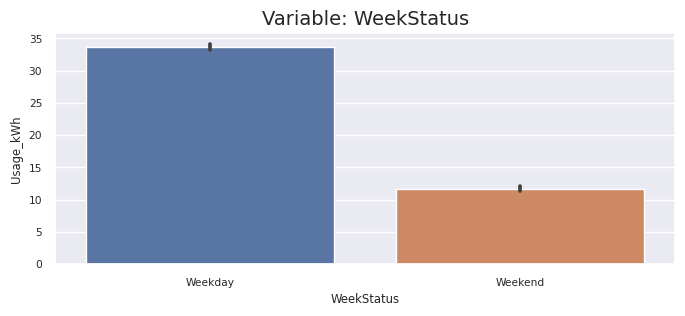

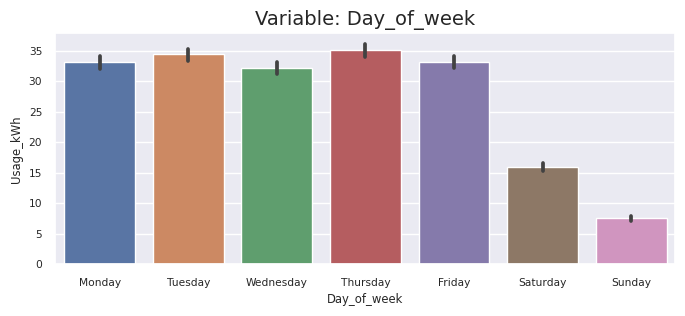

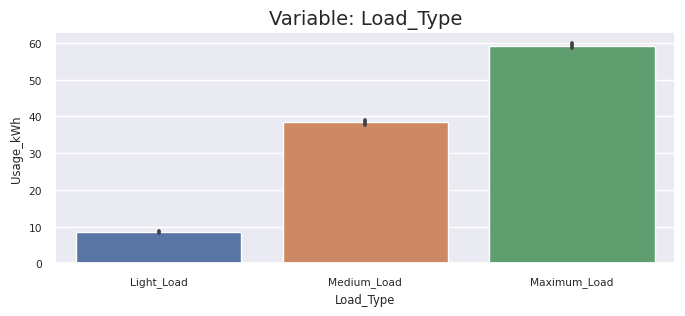

In [ ]:
for i in cat_var:
    plt.subplots(figsize=(8, 3))
    plt.title(f'Variable: {i}', fontsize=14)
    sns.barplot(x = i, y = 'Usage_kWh', data = steel)

**Interpretation: Based on the barplot we could conclude

- There is more electricity consumption on weekdays vs weekends.
- During the weekdays, there is more electricity consumption on Thursday, and on Wednesday there is less electricity consumption.
- During the weekends, on Saturday there is more electricity consumption.
- Verifying the Load_type, there is more energy consumption with maximum_load and less consumption with a light load.

In [ ]:
num_subset = steel.select_dtypes(include=['number'])

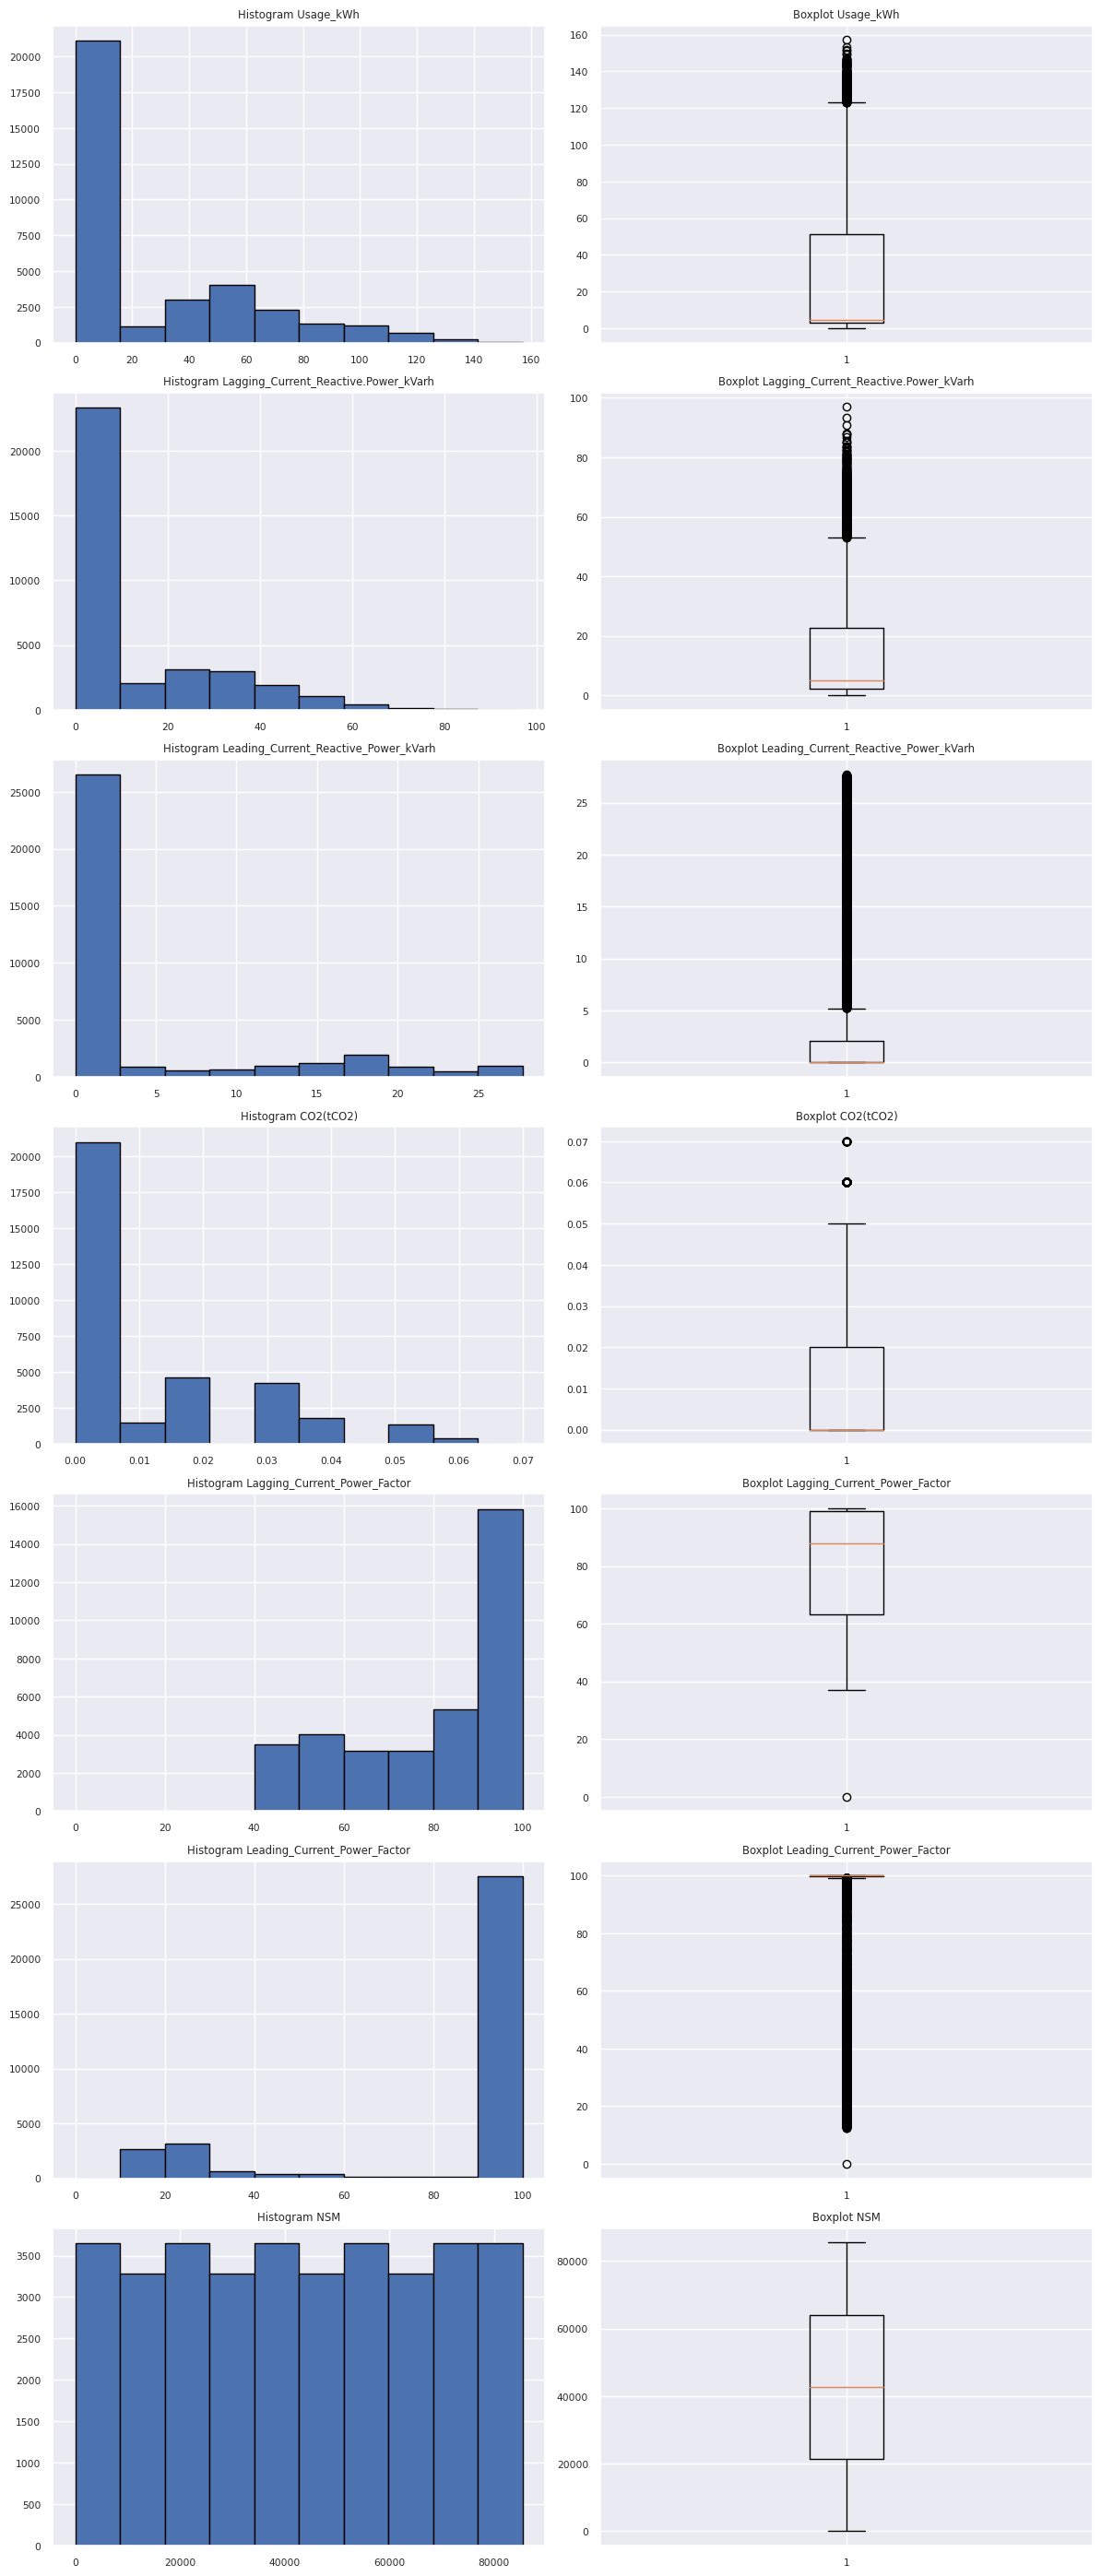

None


In [ ]:
# Creating boxplots for numerical variables to see their distribution and outliers presence:
def graph_variables(df):
  columns = df.columns
  num_plots = len(columns)
  fig, axs = plt.subplots(nrows= num_plots, ncols= 2, figsize=(12, 4*num_plots))

  #Creating histograms and boxplots
  for i, column_name in enumerate(columns):
    axs[i, 0].hist(df[column_name], edgecolor = 'black')
    axs[i, 1].boxplot(df[column_name])
    axs[i, 0].set_title('Histogram ' + column_name)
    axs[i, 1].set_title('Boxplot ' + column_name)

  plt.tight_layout()
  plt.show()
print(graph_variables(num_subset))

**Interpretation: We can see that all numerical variables with the exception of the 'NMS' variable are highly skewed, the variables 'Leading_Current_Reactive_Power_kVarh' and 'Lagging_Current_Power_Factor' are skewed to the left, the remaining variables are skewed to the right.

-----> Based on the data dictionary provided, we will modify the categorical variables to numerical in order to keep the information for the model and calculate the correlation considering all variables:

In [ ]:
steel['weekstatus_num'] = steel['WeekStatus'].map({'Weekday': 1, 'Weekend': 0})

In [ ]:
steel['week_day'] = steel['Day_of_week'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})

In [ ]:
steel['Load_Type_num'] = steel['Load_Type'].map({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2})

In [ ]:
# Dropping the categorical variables
steel = steel.drop(['WeekStatus', 'Day_of_week', 'Load_Type'], axis = 1)

In [ ]:
steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,weekstatus_num,week_day,Load_Type_num
0,3.17,2.95,0.0,0.0,73.21,100.0,900,1,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,1,0


<Axes: >

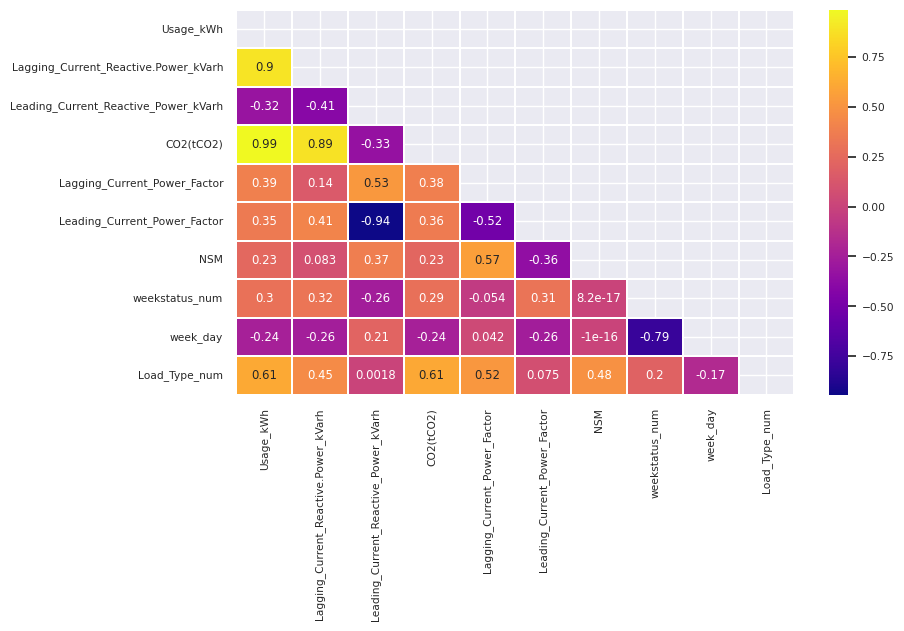

In [ ]:
# Validating the normalized cross correlation (Pearson's correlation) with the heatmap:
steel_corr = steel.corr()
sns.set(font_scale = 0.7)
plt.figure(figsize = (9, 5))
matrix = np.triu(steel_corr)
sns.heatmap(steel_corr, annot = True, linewidths = 0.01, linecolor = 'white', mask = matrix, cmap = 'plasma')

In [ ]:
# Validating the variables with the highest correlation:
cor_rank = steel_corr.stack()
cor_rank = cor_rank[cor_rank.index.get_level_values(0) < cor_rank.index.get_level_values(1)]
cor_rank = cor_rank.sort_values(ascending = False).head(3)
print('The variables with the highest linear correlation are:\n')
print(cor_rank)

The variables with the highest linear correlation are:

CO2(tCO2)                             Usage_kWh                               0.988180
Lagging_Current_Reactive.Power_kVarh  Usage_kWh                               0.896150
CO2(tCO2)                             Lagging_Current_Reactive.Power_kVarh    0.886948
dtype: float64


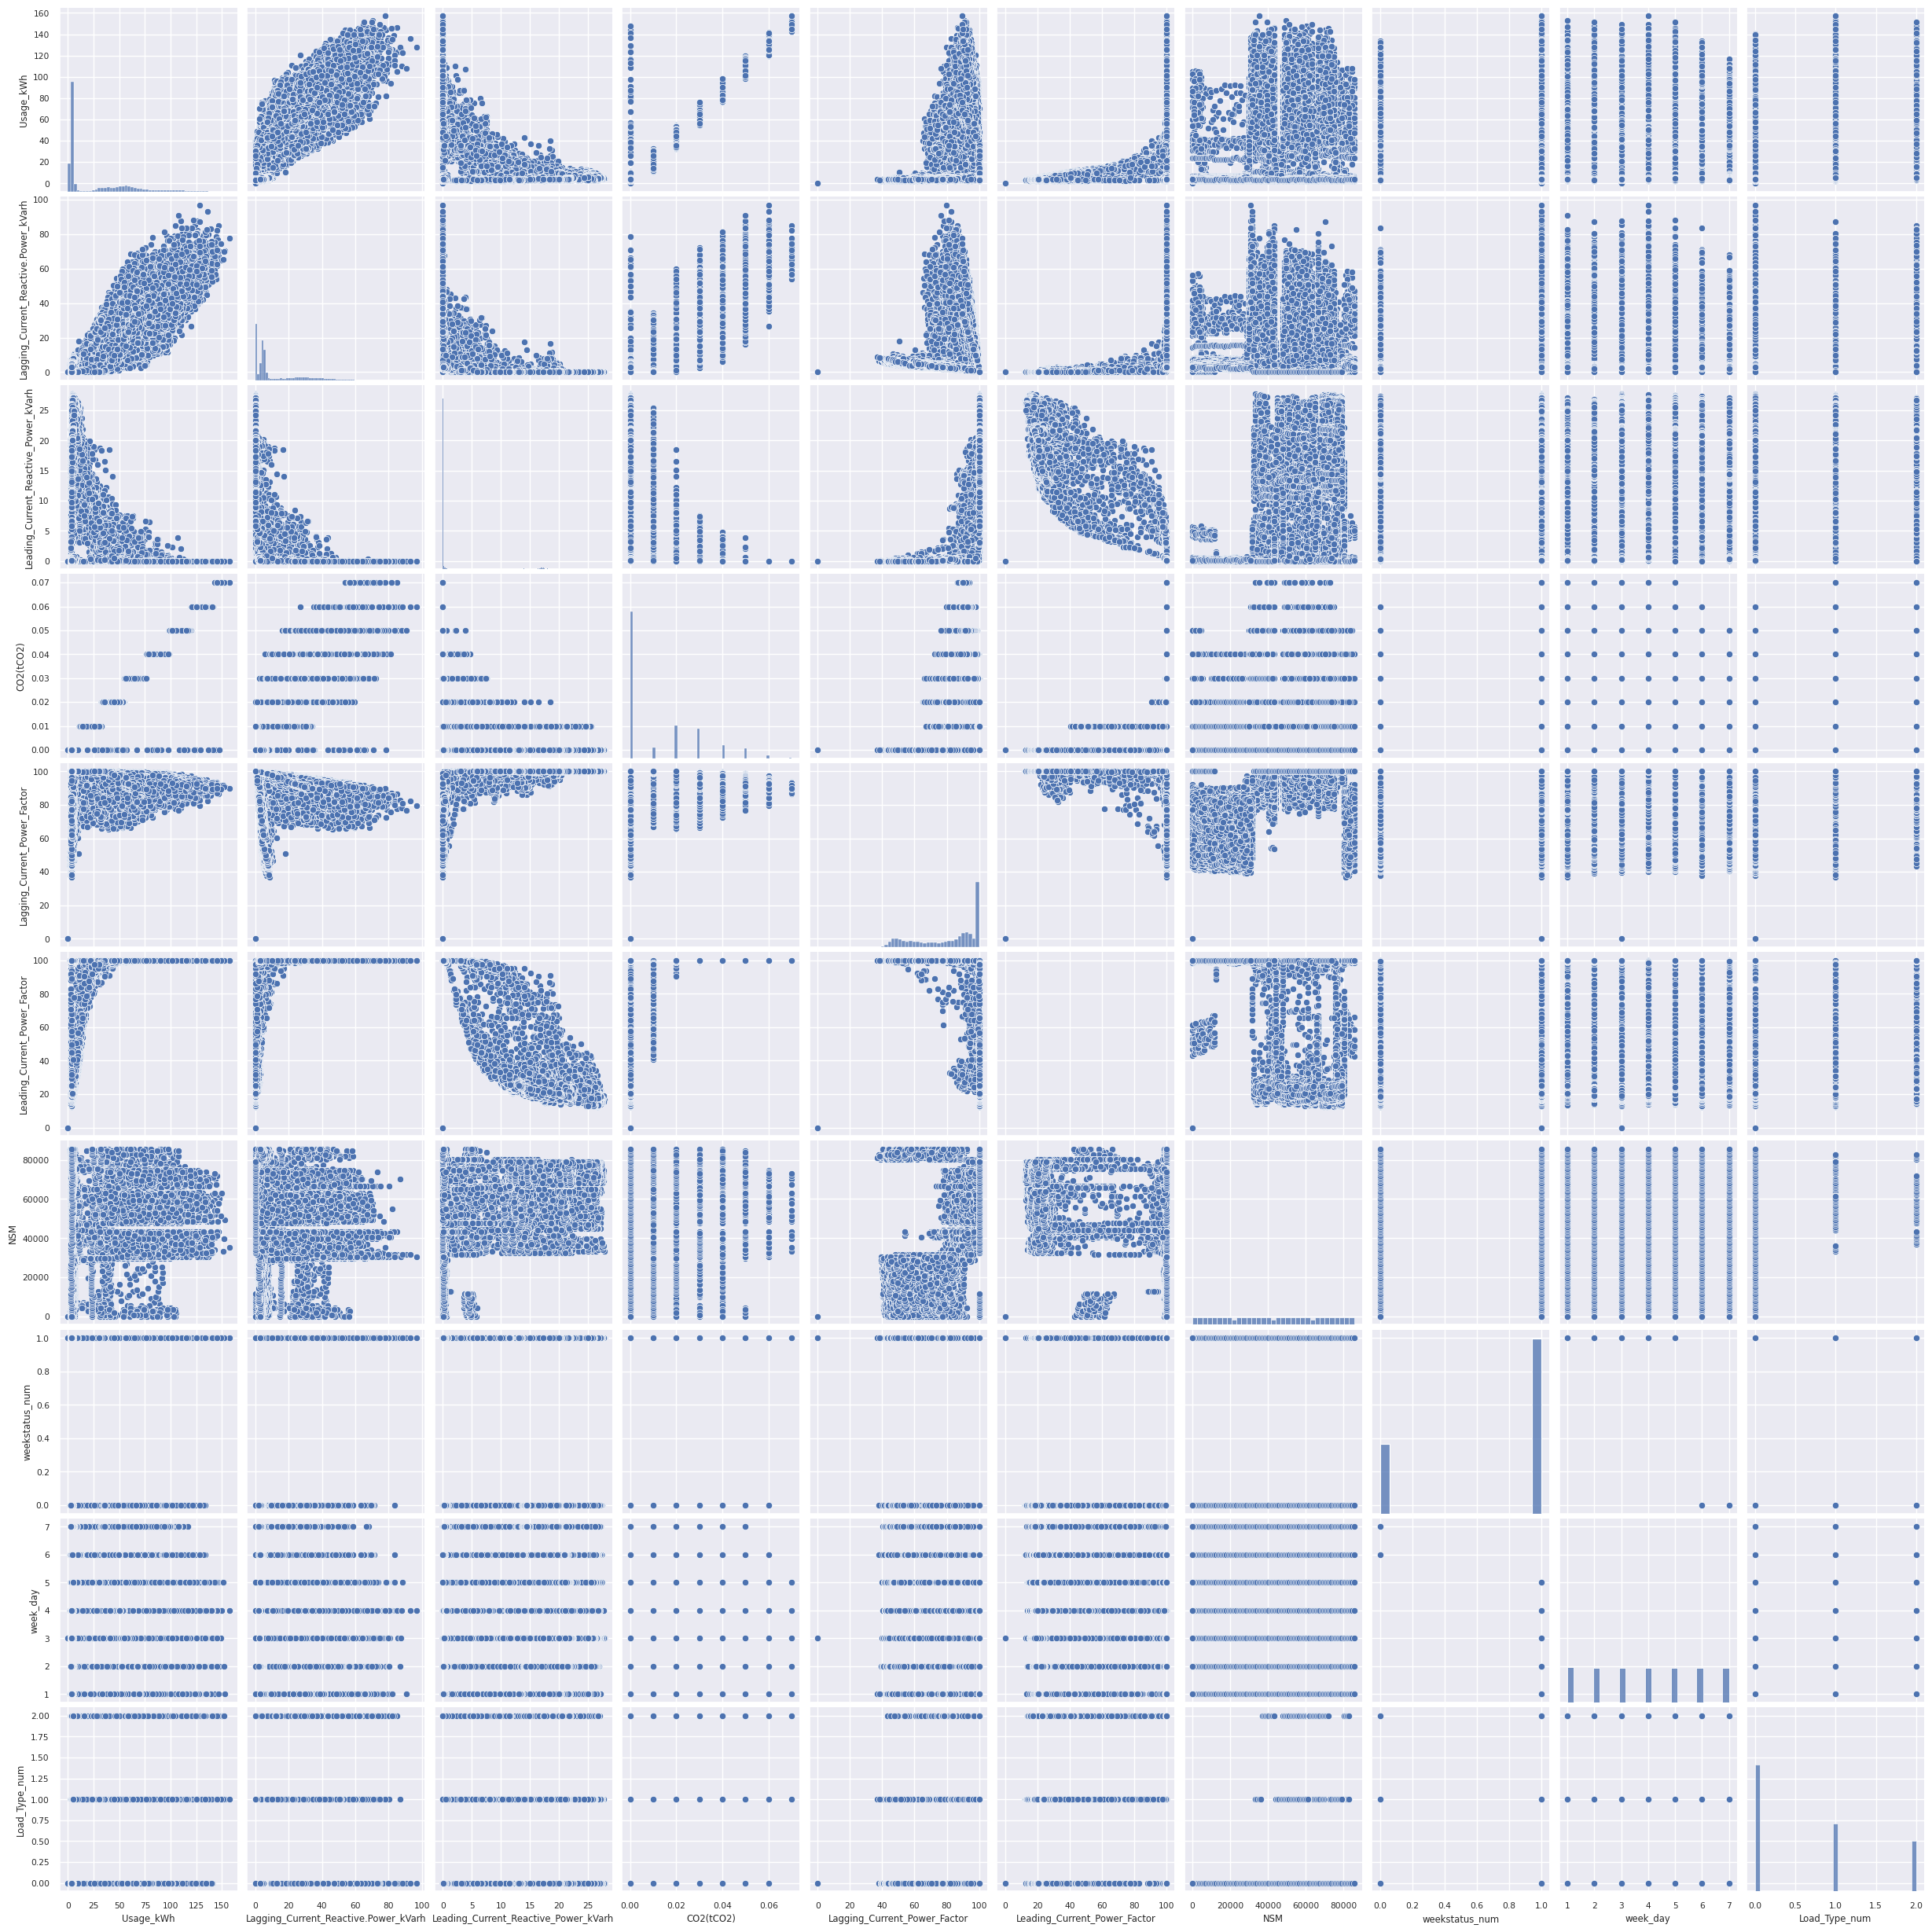

In [ ]:
# Validating the linear correlation between the variables with the scatterplot:
sns.pairplot(steel)

**Interpretation: Despite the variable 'Usage_kWh' is highly correlated with the 'Lagging_Current_Reactive.Power_kVarh' and the 'CO2_Lagging' variables we can not append them because the 'Usage_kWh' is our response variable, so we will append just the 'Lagging_Current_Reactive.Power_kVarh' and the 'CO2_Lagging' attributes.

In [ ]:
steel['CO2_Lagging'] = steel['CO2(tCO2)'] * steel['Lagging_Current_Reactive.Power_kVarh']

In [ ]:
# Dropping the correlated original attributes:
steel = steel.drop(['CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh'], axis = 1)

In [ ]:
steel.head()

,Usage_kWh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,weekstatus_num,week_day,Load_Type_num,CO2_Lagging
0,3.17,0.0,73.21,100.0,900,1,1,0,0.0
1,4.00,0.0,66.77,100.0,1800,1,1,0,0.0
2,3.24,0.0,70.28,100.0,2700,1,1,0,0.0
3,3.31,0.0,68.09,100.0,3600,1,1,0,0.0
4,3.82,0.0,64.72,100.0,4500,1,1,0,0.0


In [ ]:
steel.shape

(35040, 9)

__Question 2:__

Use the SGD Regressor class with scaling in your model [3 Marks]

In [ ]:
# Scaling and splitting the dataframe:
X3 = steel.drop(['Usage_kWh'], axis = 1)
y3 = steel['Usage_kWh']

sc = StandardScaler()
X_sc = sc.fit_transform(X3)

In [ ]:
# Perform splitting:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_sc, y3, test_size = 0.2, random_state = 101)

In [ ]:
print(X3_train.shape, y3_train.shape)
print(X3_test.shape, y3_test.shape)

(28032, 8) (28032,)
(7008, 8) (7008,)


In [ ]:
model_SGD = SGDRegressor()
mod_SGD = model_SGD.fit(X3_train, y3_train)
mod_SGD

SGDRegressor()

In [ ]:
scores = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cv_scores = cross_validate(mod_SGD, X3_train, y3_train, scoring = scores)

In [ ]:
# Predicted y_hat:
prediction_en = cross_val_predict(mod_SGD, X3_test, y3_test)
prediction_en

array([41.96283529,  2.21459313,  8.51277616, ..., 40.13631332,
       -3.27904608, 35.64710441])

In [ ]:
# Evaluating the model's performance:
def parameters(model):

  mse = -cv_scores['test_neg_mean_squared_error']
  mae = -cv_scores['test_neg_mean_absolute_error']
  r2 = cv_scores['test_r2']

  mse_mean = np.mean(mse)
  mae_mean = np.mean(mae)
  r2_mean = np.mean(r2)

  mse_sd = np.std(mse)
  mae_sd = np.std(mae)
  r2_sd = np.std(r2)

  return pd.DataFrame({'Test Parameters mean':[mse_mean,mae_mean, r2_mean],'Test Parameters SD':[mse_sd,mae_sd, r2_sd]}, index=['MSE','MAE','R2'])

accuracy = np.round(metrics.r2_score(y3_test, prediction_en)*100, decimals = 2)
sgd_en_perf = np.round(mod_SGD.score(X3_test, y3_test)*100, decimals = 2)

In [ ]:
print(parameters(mod_SGD))
print('\nModel accuracy {0}%'.format(accuracy))
print('\nModel performance {0}%'.format(sgd_en_perf))

     Test Parameters mean  Test Parameters SD
MSE             71.515383            4.524409
MAE              5.985685            0.077454
R2               0.936366            0.003279

Model accuracy 93.4%

Model performance 93.36%


__Question 3:__

Use repeated k cross fold with 2 repeats and k = 5. [3 Marks]

In [ ]:
# Scaling and splitting the dataframe:
X4 = steel.drop(['Usage_kWh'], axis = 1)
y4 = steel['Usage_kWh']

sc = StandardScaler()
X_sc2 = sc.fit_transform(X4)

In [ ]:
# Perform splitting:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_sc2, y4, test_size = 0.2, random_state = 101)

In [ ]:
print(X4_train.shape, y4_train.shape)
print(X4_test.shape, y4_test.shape)

(28032, 8) (28032,)
(7008, 8) (7008,)


In [ ]:
model_SGD2 = SGDRegressor()
mod_SGD2 = model_SGD.fit(X4_train, y4_train)
mod_SGD2

SGDRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=2)
cv_scores2 = cross_validate(mod_SGD2, X4_train, y4_train, scoring = scores, cv = cv)

In [ ]:
# Predicted y_hat by performing the cross validation in the 5-folds:
prediction_SGD2 = cross_val_predict(mod_SGD2, X4_test, y4_test, cv = 5)
prediction_SGD2

array([42.66687971,  1.37155244,  8.11534641, ..., 40.14839647,
       -3.50152199, 35.27728465])

In [ ]:
# Evaluating the model's performance:
def parameters(model):

  mse2 = -cv_scores2['test_neg_mean_squared_error']
  mae2 = -cv_scores2['test_neg_mean_absolute_error']
  r2_2 = cv_scores2['test_r2']

  mse_mean2 = np.mean(mse2)
  mae_mean2 = np.mean(mae2)
  r2_mean2 = np.mean(r2_2)

  mse_sd2 = np.std(mse2)
  mae_sd2 = np.std(mae2)
  r2_sd2 = np.std(r2_2)

  return pd.DataFrame({'Test Parameters mean':[mse_mean2,mae_mean2, r2_mean2],'Test Parameters SD':[mse_sd2,mae_sd2, r2_sd2]}, index=['MSE','MAE','R2'])



In [ ]:
accuracy2 = np.round(metrics.r2_score(y4_test, prediction_SGD2)*100, decimals = 2)
sgd_SGD_perf2 = np.round(mod_SGD2.score(X4_test, y4_test)*100, decimals = 2)

In [ ]:
print(parameters(mod_SGD2))
print('\nModel accuracy {0}%'.format(accuracy2))
print('\nModel performance {0}%'.format(sgd_SGD_perf2))

     Test Parameters mean  Test Parameters SD
MSE             71.503073            3.372661
MAE              5.983542            0.073638
R2               0.936355            0.002764

Model accuracy 93.39%

Model performance 93.4%


__Question 4:__

Optimize and find the optimal hyperparameters of tolerance and alpha. [3 Marks]

In [ ]:
# Scaling and splitting the dataframe:
X5 = steel.drop(['Usage_kWh'], axis = 1)
y5 = steel['Usage_kWh']

sc = StandardScaler()
X_sc3 = sc.fit_transform(X5)

In [ ]:
# We will find the optimal hyperparameter using the feature selection of Random Forest:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_sc3, y5, test_size = 0.2, random_state = 101)

In [ ]:
forest = RandomForestRegressor(n_estimators = 510, random_state = 1)

In [ ]:
forest.fit(X5_train, y5_train)

RandomForestRegressor(n_estimators=510, random_state=1)

In [ ]:
importances = forest.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

(-1.0, 8.0)

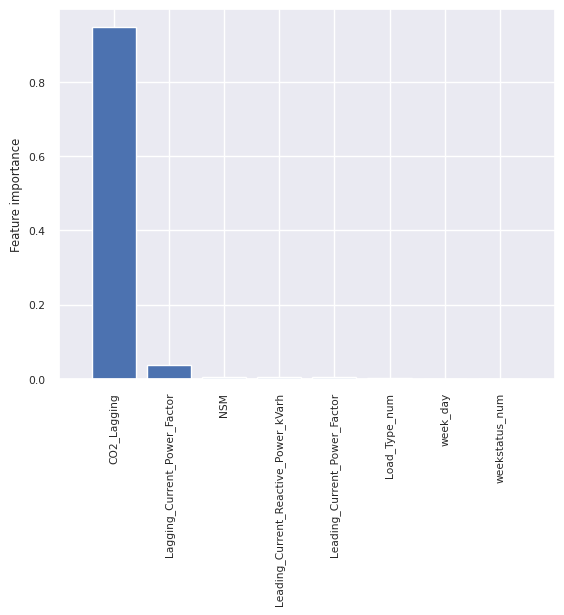

In [ ]:
plt.ylabel('Feature importance')
plt.bar(range(X5_train.shape[1]), importances[indices], align = 'center')
feat_labels = steel.columns[1:]
plt.xticks(range(X5_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X5_train.shape[1]])

In [ ]:
# Scaling and splitting the dataframe with the 5 variable that have relevance for the model based on the Random Forest result:
X6 = steel[['CO2_Lagging', 'Lagging_Current_Power_Factor', 'NSM', 'Leading_Current_Reactive_Power_kVarh', 'Leading_Current_Power_Factor']]
y6 = steel['Usage_kWh']

sc = StandardScaler()
X_sc4 = sc.fit_transform(X6)

In [ ]:
# Perform splitting:
X6_train, X6_test, y6_train, y6_test = train_test_split(X_sc4, y6, test_size = 0.2, random_state = 101)

In [ ]:
print(X6_train.shape, y6_train.shape)
print(X6_test.shape, y6_test.shape)

(28032, 5) (28032,)
(7008, 5) (7008,)


In [ ]:
model_SGD3 = SGDRegressor()
mod_SGD3 = model_SGD3.fit(X6_train, y6_train)
mod_SGD3

SGDRegressor()

In [ ]:
cv_scores3 = cross_validate(mod_SGD3, X6_train, y6_train, scoring = scores, cv = cv)

In [ ]:
# Predicted y_hat by performing the cross validation in the 5-folds:
prediction_SGD3 = cross_val_predict(mod_SGD3, X6_test, y6_test, cv = 5)
prediction_SGD3

array([43.76961146,  3.84296363,  8.85383519, ..., 42.28264683,
       -4.25635495, 37.42462405])

In [ ]:
# Evaluating the model's performance:
def parameters(model):

  mse3 = -cv_scores3['test_neg_mean_squared_error']
  mae3 = -cv_scores3['test_neg_mean_absolute_error']
  r2_3 = cv_scores3['test_r2']

  mse_mean3 = np.mean(mse3)
  mae_mean3 = np.mean(mae3)
  r2_mean3 = np.mean(r2_3)

  mse_sd3 = np.std(mse3)
  mae_sd3 = np.std(mae3)
  r2_sd3 = np.std(r2_3)

  return pd.DataFrame({'Test Parameters mean':[mse_mean3,mae_mean3, r2_mean3],'Test Parameters SD':[mse_sd3,mae_sd3, r2_sd3]}, index=['MSE','MAE','R2'])



In [ ]:
accuracy3 = np.round(metrics.r2_score(y6_test, prediction_SGD3)*100, decimals = 2)
sgd_SGD_perf3 = np.round(mod_SGD3.score(X6_test, y6_test)*100, decimals = 2)

In [ ]:
print(parameters(mod_SGD3))
print('\nModel accuracy {0}%'.format(accuracy3))
print('\nModel performance {0}%'.format(sgd_SGD_perf3))

     Test Parameters mean  Test Parameters SD
MSE             77.713442            2.403470
MAE              6.131124            0.042032
R2               0.930756            0.003134

Model accuracy 92.98%

Model performance 92.97%


__Question 5:__

Use Elastic net regularization and find its optimal parameters for the model. [2 Marks]

In [ ]:
model_SGD4 = SGDRegressor(penalty = 'elasticnet')
mod_SGD4 = model_SGD4.fit(X6_train, y6_train)
mod_SGD4

SGDRegressor(penalty='elasticnet')

In [ ]:
param = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept':[True, False],
    'eta0':[0.1, 0.01]
}

In [ ]:
search = GridSearchCV(model_SGD4, param, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

In [ ]:
result = search.fit(X_sc4, y6)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -8.802251846538217
Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.01, 'fit_intercept': True, 'penalty': 'l1'}


In [ ]:
# Creating the new model with the specified Hyperparameters:
model_SGD5 = SGDRegressor(alpha = 0.01, eta0 = 0.01, fit_intercept = True, penalty = 'l1')
mod_SGD5 = model_SGD5.fit(X6_train, y6_train)
mod_SGD5

SGDRegressor(alpha=0.01, penalty='l1')

In [ ]:
cv_scores4 = cross_validate(mod_SGD5, X6_train, y6_train, scoring = scores, cv = cv)

In [ ]:
prediction_SGD4 = cross_val_predict(mod_SGD4, X6_test, y6_test, cv = 5)
prediction_SGD4

array([43.65088002,  3.63740666,  8.9947977 , ..., 42.48610102,
       -4.44375265, 37.26964301])

In [ ]:
# Evaluating the model's performance:
def parameters(model):

  mse4 = -cv_scores4['test_neg_mean_squared_error']
  mae4 = -cv_scores4['test_neg_mean_absolute_error']
  r2_4 = cv_scores4['test_r2']

  mse_mean4 = np.mean(mse4)
  mae_mean4 = np.mean(mae4)
  r2_mean4 = np.mean(r2_4)

  mse_sd4 = np.std(mse4)
  mae_sd4 = np.std(mae4)
  r2_sd4 = np.std(r2_4)

  return pd.DataFrame({'Test Parameters mean':[mse_mean4,mae_mean4, r2_mean4],'Test Parameters SD':[mse_sd4,mae_sd4, r2_sd4]}, index=['MSE','MAE','R2'])



In [ ]:
accuracy4 = np.round(metrics.r2_score(y6_test, prediction_SGD4)*100, decimals = 2)
sgd_SGD_perf4 = np.round(mod_SGD4.score(X6_test, y6_test)*100, decimals = 2)

In [ ]:
print(parameters(mod_SGD4))
print('\nModel accuracy {0}%'.format(accuracy4))
print('\nModel performance {0}%'.format(sgd_SGD_perf4))

     Test Parameters mean  Test Parameters SD
MSE             77.693586            2.958157
MAE              6.131192            0.087175
R2               0.930838            0.002075

Model accuracy 92.98%

Model performance 92.93%


--> In this result, we can see that the model accuracy is a little bit lowen than the full model (with all variables), furthermore, the MSE and MAE is higher as well so we can conclude that the model with all variables and default penalties (l2) and 5 k-cross validation and 2 repetitions perform better. Howerver, if we consider the complexity of the model, we could say that mod_SGD5 is less complex (less dimension) and has a good performance as well with less probability of error.